In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv("GlobalLandTemperaturesByCity.csv")

In [3]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


# EDA

In [4]:
df["dt"] = pd.to_datetime(df["dt"]) 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   dt                             datetime64[ns]
 1   AverageTemperature             float64       
 2   AverageTemperatureUncertainty  float64       
 3   City                           object        
 4   Country                        object        
 5   Latitude                       object        
 6   Longitude                      object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 459.2+ MB


In [6]:
df.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [9]:
#from pandas_profiling import ProfileReport

#profile = ProfileReport(df, title = "Pandas Profiling Report", html = {"style":{"full_width":True}})
#profile

In [10]:
argentina = df[df["Country"] == "Argentina"]

In [11]:
df["Country"].unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

In [12]:
argentina["City"].unique()

array(['Bahia Blanca', 'Catamarca', 'Comodoro Rivadavia', 'Concordia',
       'Cordoba', 'Corrientes', 'Formosa', 'Jujuy', 'La Plata',
       'La Rioja', 'Lambaré', 'Mar Del Plata', 'Mendoza', 'Mercedes',
       'Neuquen', 'Parana', 'Posadas', 'Resistencia', 'Rio Cuarto',
       'Rosario', 'Salta', 'San Carlos De Bariloche', 'San Juan',
       'San Luis', 'San Martin', 'San Nicolas', 'San Rafael', 'Santa Fe',
       'Santiago Del Estero', 'Tandil', 'Trelew', 'Tucuman'], dtype=object)

In [13]:
argentina["Year"] = argentina["dt"].dt.year 
argentina["Month"] = argentina["dt"].dt.month 

/tmp/ipykernel_62083/1160028187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  argentina["Year"] = argentina["dt"].dt.year
/tmp/ipykernel_62083/1160028187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  argentina["Month"] = argentina["dt"].dt.month


# Average Temperature per year and province

In [14]:
argentina["Averagetemperature_per_year"] = argentina.groupby(["Year", "City"])["AverageTemperature"].transform('mean')

/tmp/ipykernel_62083/2416072880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  argentina["Averagetemperature_per_year"] = argentina.groupby(["Year", "City"])["AverageTemperature"].transform('mean')


In [15]:
argentina_average = argentina.drop(["dt", "AverageTemperatureUncertainty", "Month",
                            "Country", "AverageTemperature"], axis = 1)

In [16]:
argentina_average = argentina.drop_duplicates()

In [17]:
argentina_average.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month,Averagetemperature_per_year
556600,1855-05-01,11.368,1.730,Bahia Blanca,Argentina,39.38S,62.43W,1855,5,12.088875
556601,1855-06-01,7.929,1.950,Bahia Blanca,Argentina,39.38S,62.43W,1855,6,12.088875
556602,1855-07-01,7.626,1.774,Bahia Blanca,Argentina,39.38S,62.43W,1855,7,12.088875
556603,1855-08-01,9.246,1.621,Bahia Blanca,Argentina,39.38S,62.43W,1855,8,12.088875
556604,1855-09-01,10.941,1.535,Bahia Blanca,Argentina,39.38S,62.43W,1855,9,12.088875


Text(0.5, 0.98, 'histogrma de temperaturas medias')

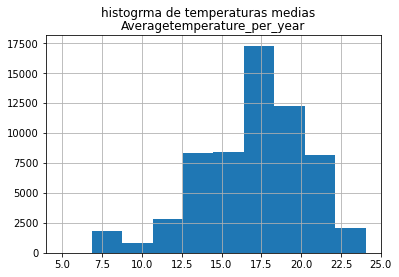

In [18]:
# pandas plot histogram
argentina_average.hist(column = 'Averagetemperature_per_year')
plt.suptitle("histogrma de temperaturas medias")

In [19]:
city = ['Bahia Blanca', 'Catamarca', 'Comodoro Rivadavia', 'Concordia',
       'Cordoba', 'Corrientes', 'Formosa', 'Jujuy', 'La Plata',
       'La Rioja', 'Lambaré', 'Mar Del Plata', 'Mendoza', 'Mercedes',
       'Neuquen', 'Parana', 'Posadas', 'Resistencia', 'Rio Cuarto',
       'Rosario', 'Salta', 'San Carlos De Bariloche', 'San Juan',
       'San Luis', 'San Martin', 'San Nicolas', 'San Rafael', 'Santa Fe',
       'Santiago Del Estero', 'Tandil', 'Trelew', 'Tucuman']

/tmp/ipykernel_62083/1596982807.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


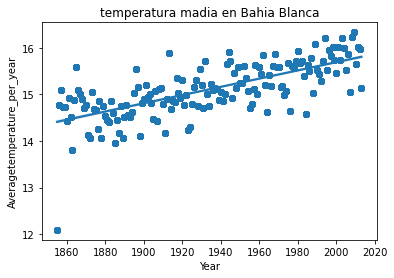

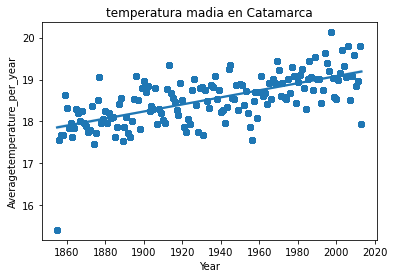

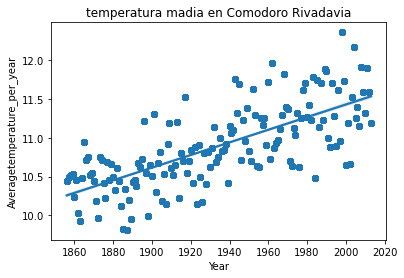

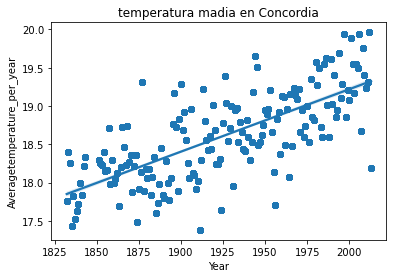

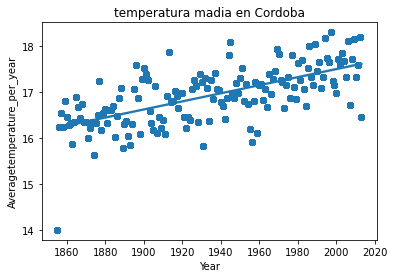

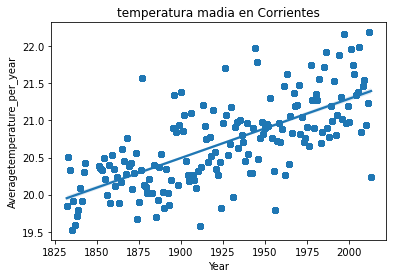

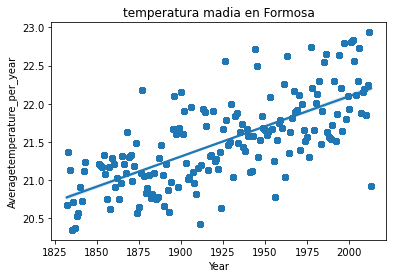

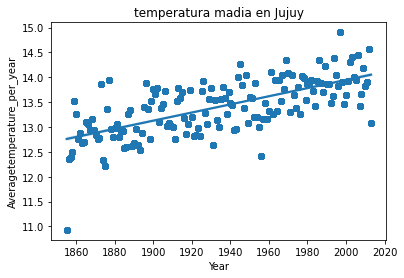

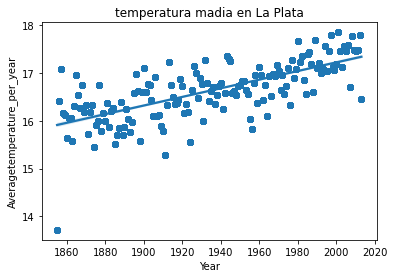

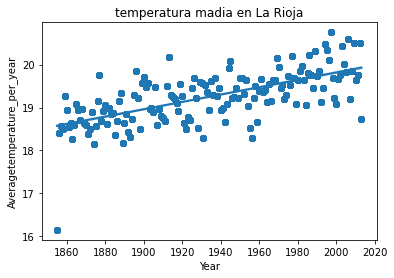

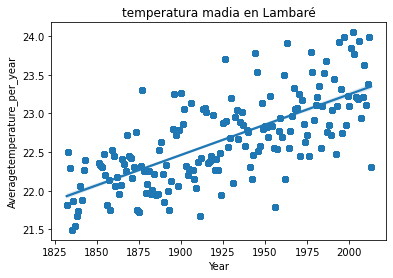

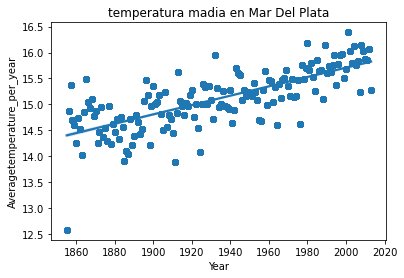

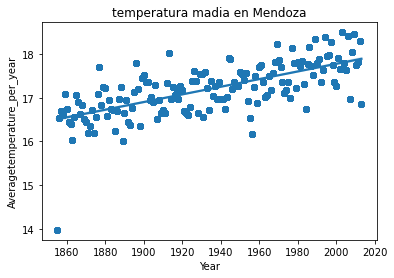

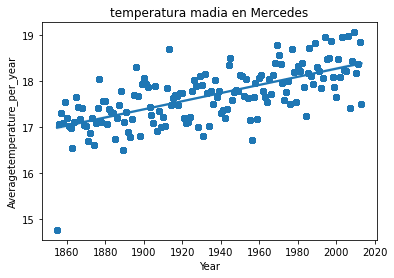

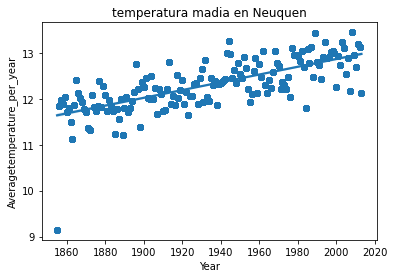

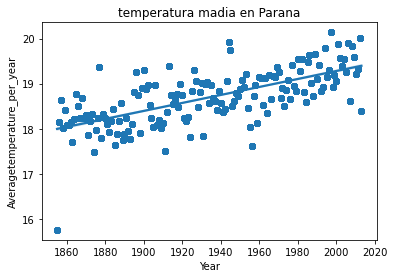

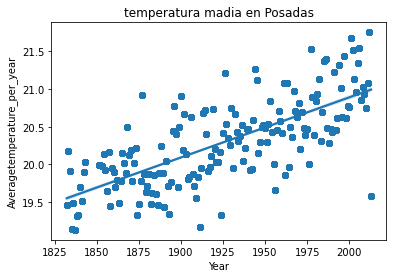

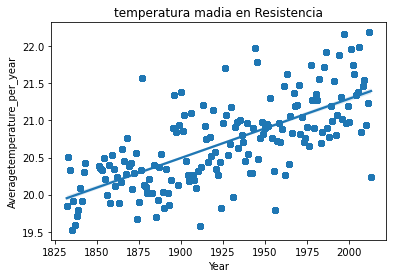

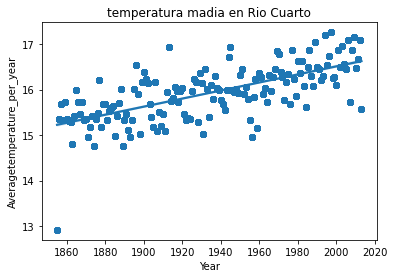

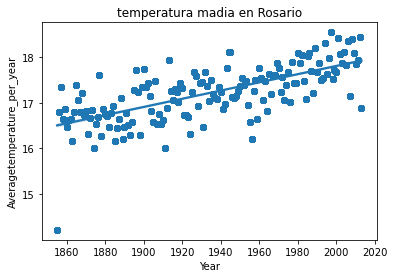

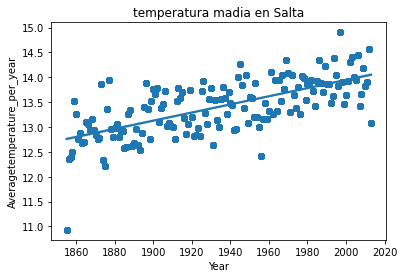

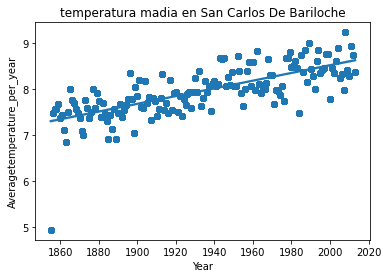

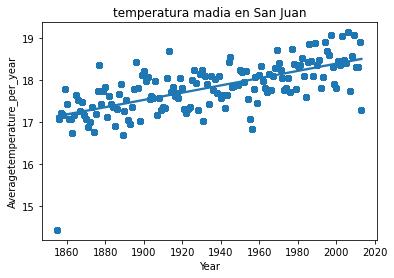

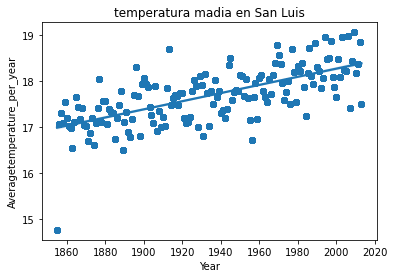

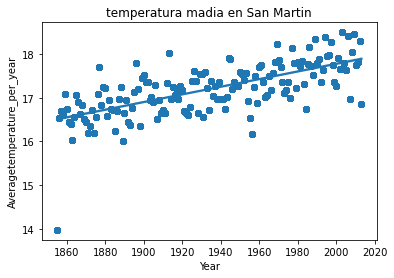

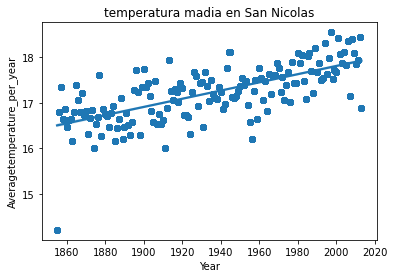

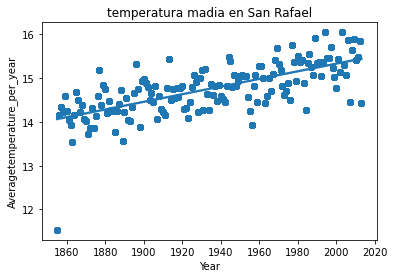

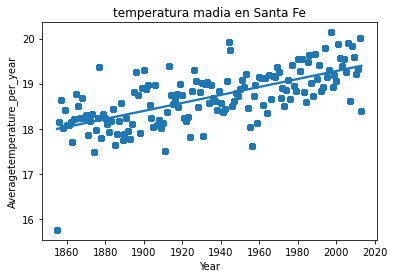

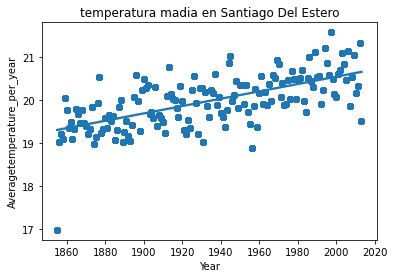

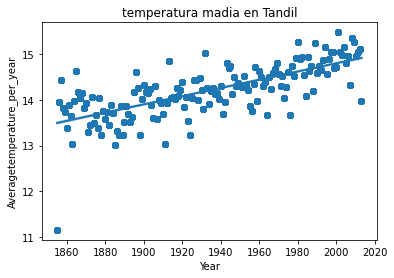

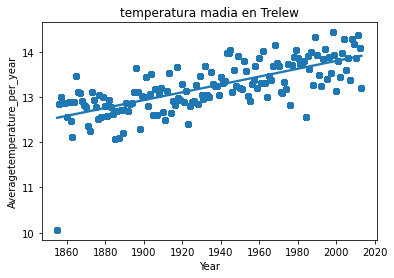

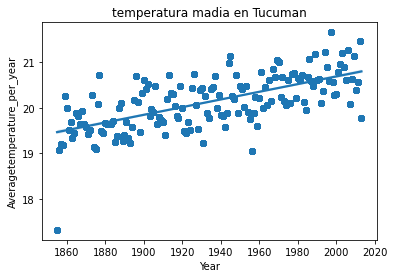

In [20]:
for i in city:
    DATA = argentina_average[argentina_average["City"] == i]
    plt.figure()
    ax = sns.regplot(x = "Year", y = "Averagetemperature_per_year", data = DATA).set(title = f"temperatura madia en {i}")
    

# Max Average Temperature

In [21]:
argentina["Max_average_temperature_per_year"] = argentina.groupby("Year")["AverageTemperature"].transform('max')
argentina.head()                                                      

/tmp/ipykernel_62083/135706213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  argentina["Max_average_temperature_per_year"] = argentina.groupby("Year")["AverageTemperature"].transform('max')


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month,Averagetemperature_per_year,Max_average_temperature_per_year
556600,1855-05-01,11.368,1.730,Bahia Blanca,Argentina,39.38S,62.43W,1855,5,12.088875,27.817
556601,1855-06-01,7.929,1.950,Bahia Blanca,Argentina,39.38S,62.43W,1855,6,12.088875,27.817
556602,1855-07-01,7.626,1.774,Bahia Blanca,Argentina,39.38S,62.43W,1855,7,12.088875,27.817
556603,1855-08-01,9.246,1.621,Bahia Blanca,Argentina,39.38S,62.43W,1855,8,12.088875,27.817
556604,1855-09-01,10.941,1.535,Bahia Blanca,Argentina,39.38S,62.43W,1855,9,12.088875,27.817


In [22]:
argentina_max = argentina.drop(["dt", "AverageTemperature", "AverageTemperatureUncertainty",
                            "Month", "Country", "Averagetemperature_per_year"], axis = 1)

In [23]:
argentina_max = argentina_max.drop_duplicates()

In [24]:
argentina_max.head()

,City,Latitude,Longitude,Year,Max_average_temperature_per_year
556600,Bahia Blanca,39.38S,62.43W,1855,27.817
556608,Bahia Blanca,39.38S,62.43W,1856,26.852
556620,Bahia Blanca,39.38S,62.43W,1857,27.062
556632,Bahia Blanca,39.38S,62.43W,1858,27.202
556644,Bahia Blanca,39.38S,62.43W,1859,26.144


/tmp/ipykernel_62083/255828775.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


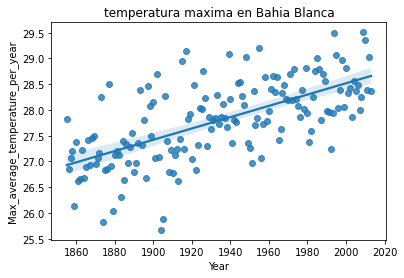

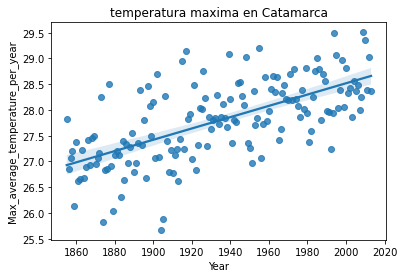

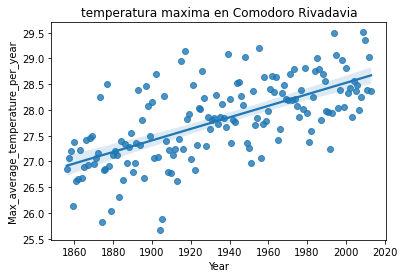

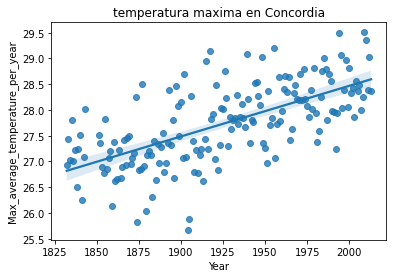

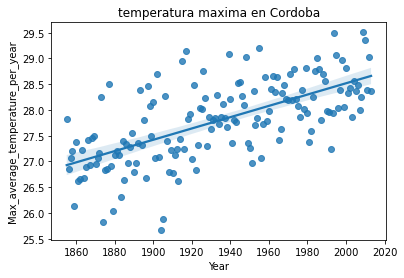

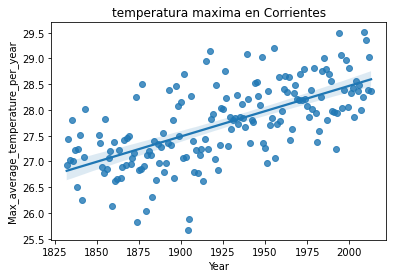

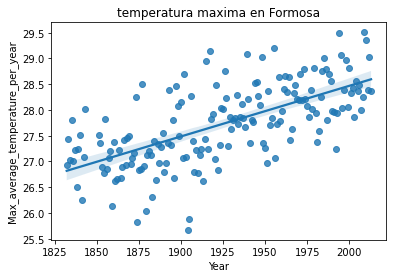

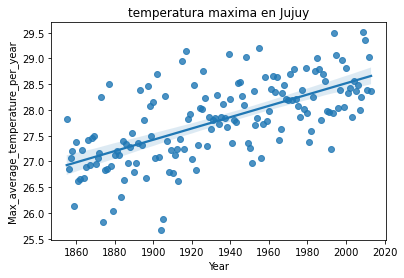

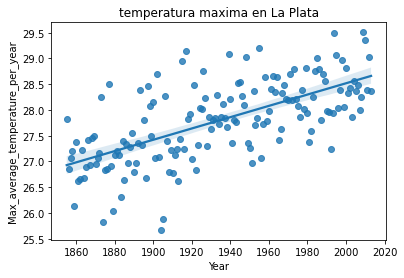

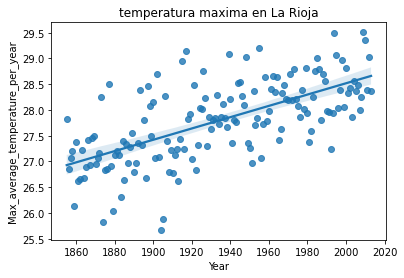

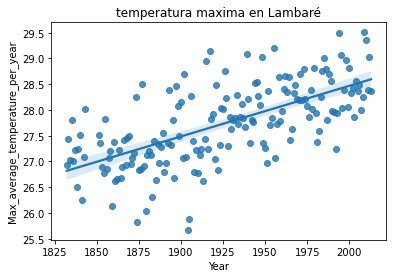

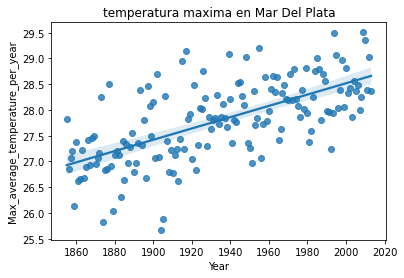

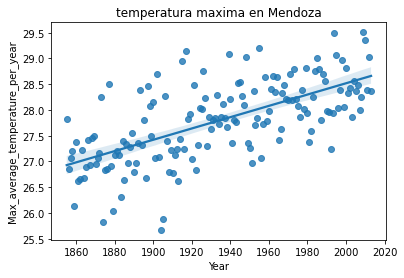

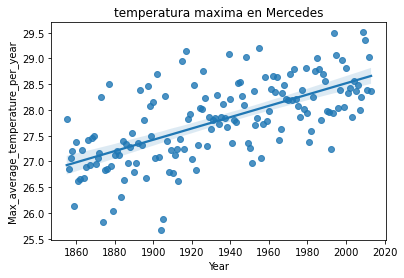

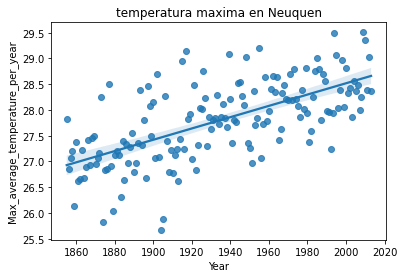

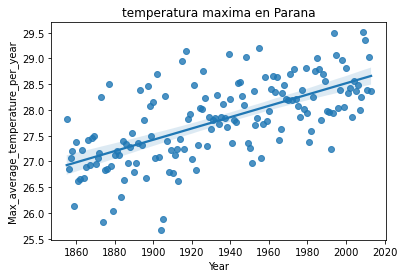

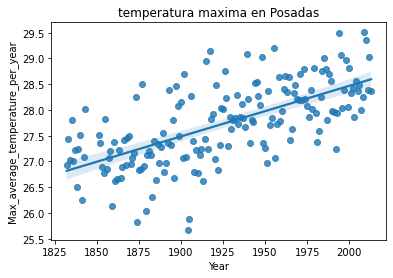

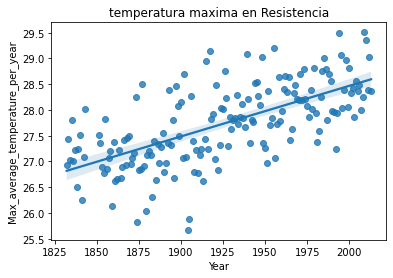

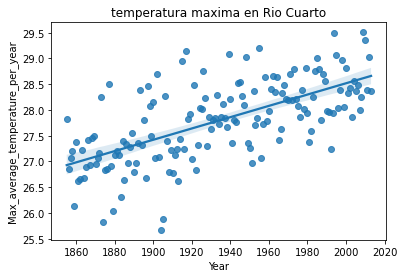

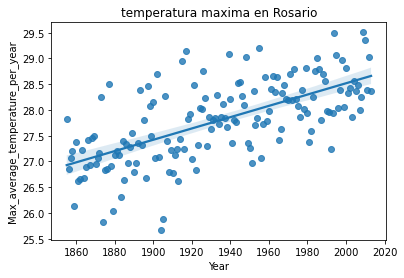

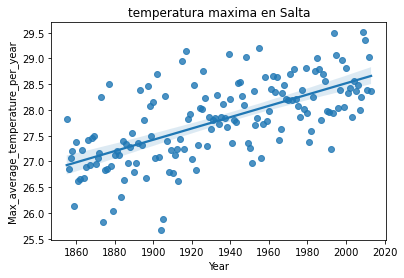

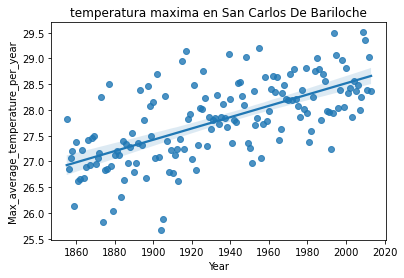

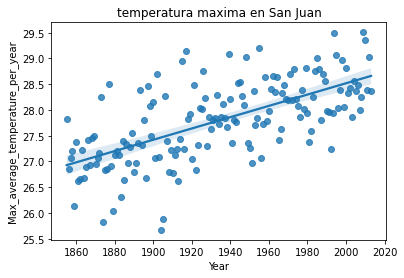

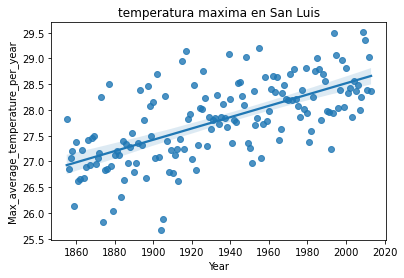

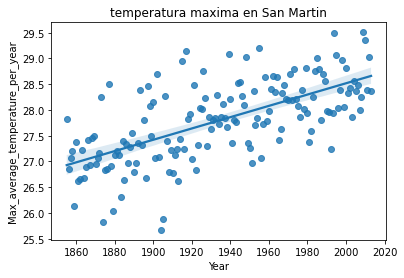

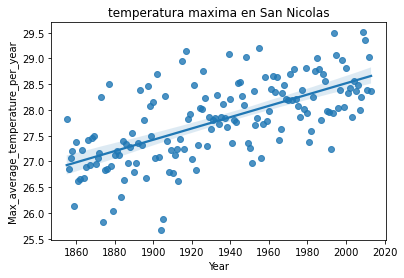

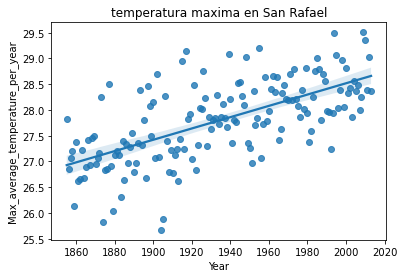

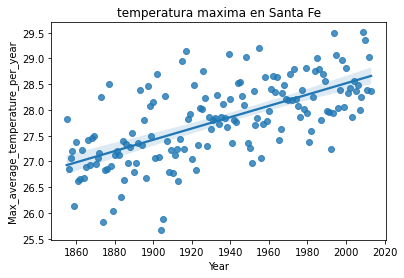

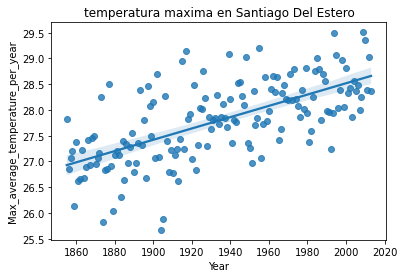

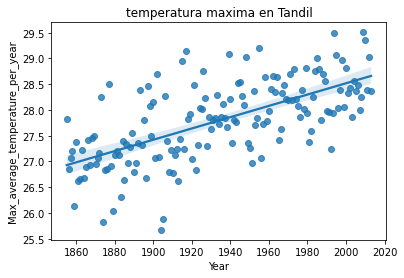

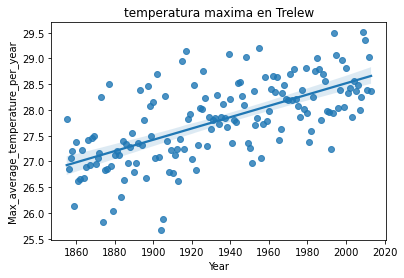

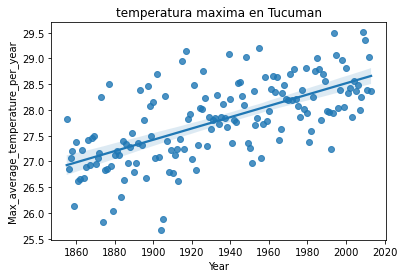

In [25]:
for i in city:
    DATA = argentina_max[argentina_max["City"] == i]
    plt.figure()
    ax = sns.regplot(x = "Year", y = "Max_average_temperature_per_year", data = DATA).set(title = f"temperatura maxima en {i}")

# Min Average Temperature

In [26]:
argentina["Min_average_temperature_per_year"] = argentina.groupby("Year")["AverageTemperature"].transform('min')
argentina.head()   

/tmp/ipykernel_62083/3523040086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  argentina["Min_average_temperature_per_year"] = argentina.groupby("Year")["AverageTemperature"].transform('min')


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month,Averagetemperature_per_year,Max_average_temperature_per_year,Min_average_temperature_per_year
556600,1855-05-01,11.368,1.730,Bahia Blanca,Argentina,39.38S,62.43W,1855,5,12.088875,27.817,0.499
556601,1855-06-01,7.929,1.950,Bahia Blanca,Argentina,39.38S,62.43W,1855,6,12.088875,27.817,0.499
556602,1855-07-01,7.626,1.774,Bahia Blanca,Argentina,39.38S,62.43W,1855,7,12.088875,27.817,0.499
556603,1855-08-01,9.246,1.621,Bahia Blanca,Argentina,39.38S,62.43W,1855,8,12.088875,27.817,0.499
556604,1855-09-01,10.941,1.535,Bahia Blanca,Argentina,39.38S,62.43W,1855,9,12.088875,27.817,0.499


In [27]:
argentina_min = argentina.drop(["dt", "AverageTemperature", "AverageTemperatureUncertainty",
                            "Month", "Country", "Averagetemperature_per_year"], axis = 1)

In [28]:
argentina_min = argentina_min.drop_duplicates()

In [29]:
argentina_min.head()

,City,Latitude,Longitude,Year,Max_average_temperature_per_year,Min_average_temperature_per_year
556600,Bahia Blanca,39.38S,62.43W,1855,27.817,0.499
556608,Bahia Blanca,39.38S,62.43W,1856,26.852,1.080
556620,Bahia Blanca,39.38S,62.43W,1857,27.062,1.541
556632,Bahia Blanca,39.38S,62.43W,1858,27.202,0.083
556644,Bahia Blanca,39.38S,62.43W,1859,26.144,1.554


/tmp/ipykernel_62083/4057054197.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


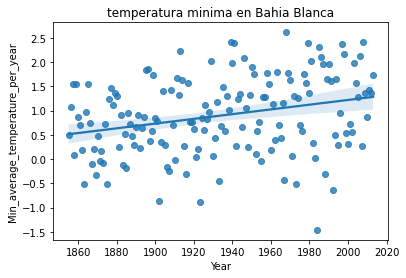

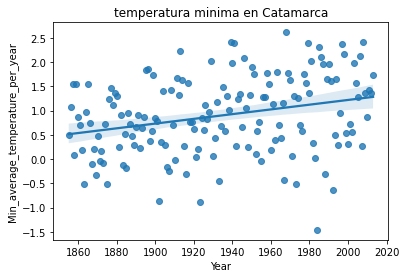

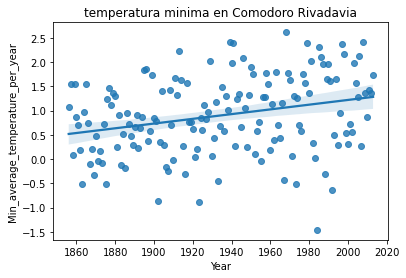

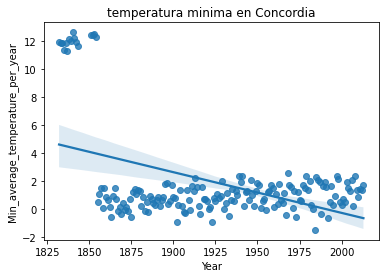

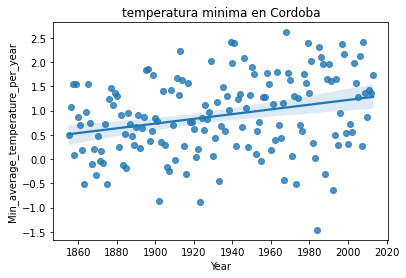

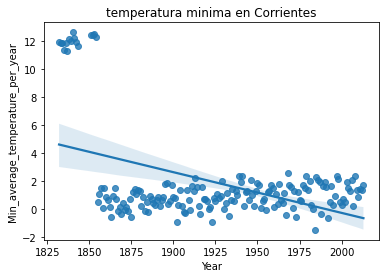

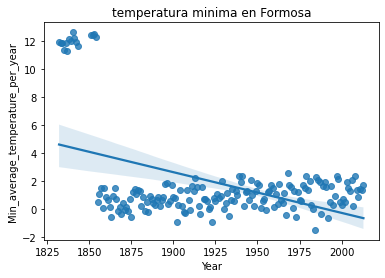

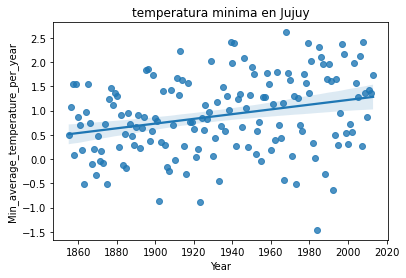

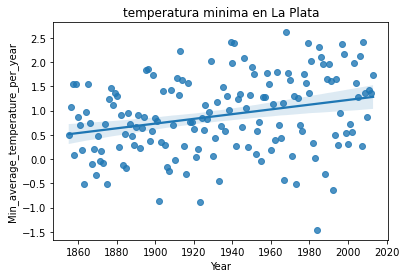

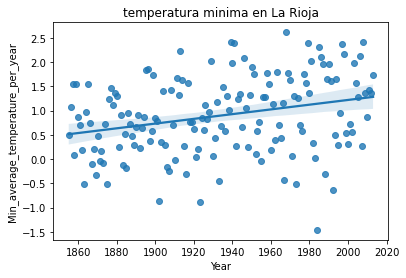

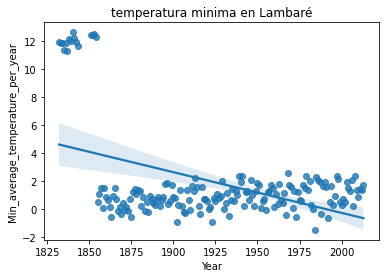

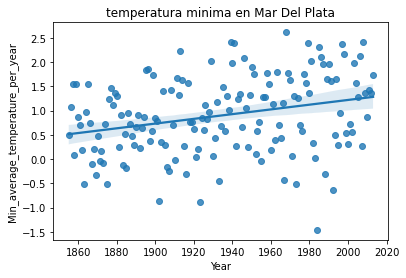

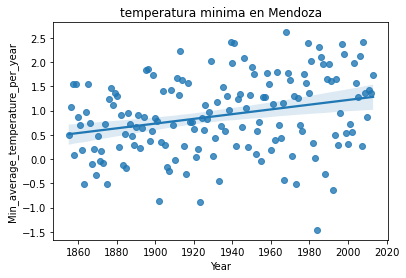

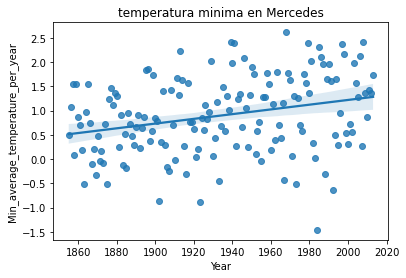

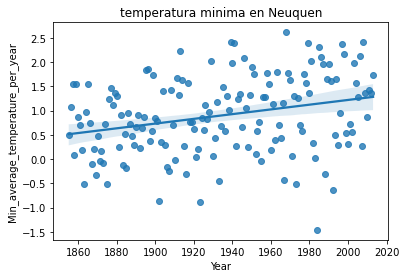

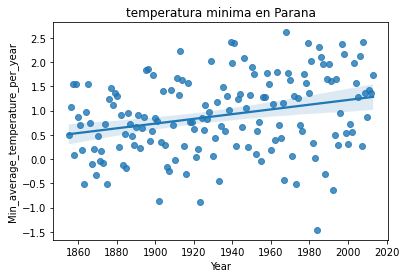

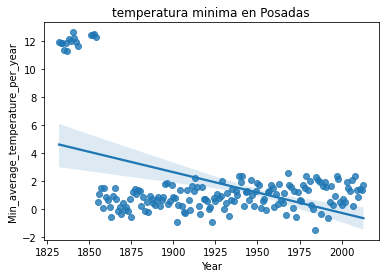

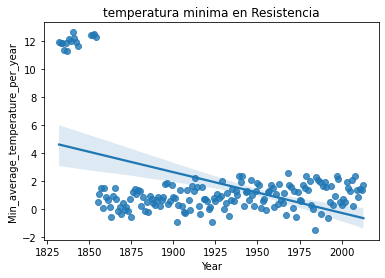

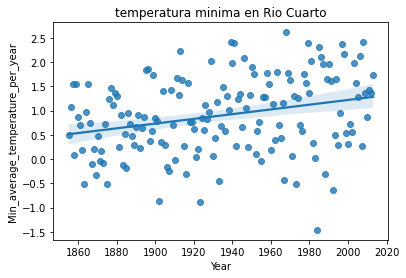

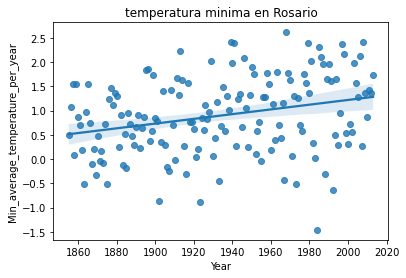

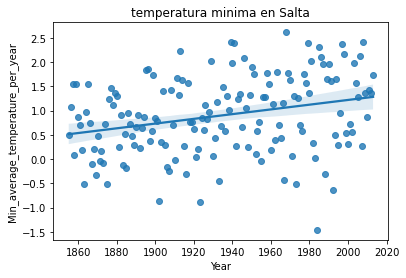

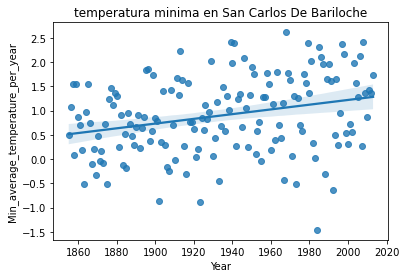

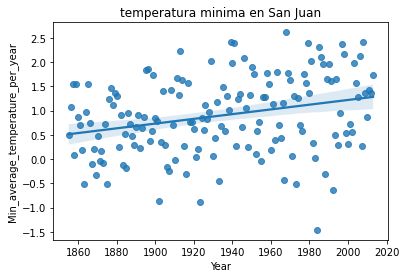

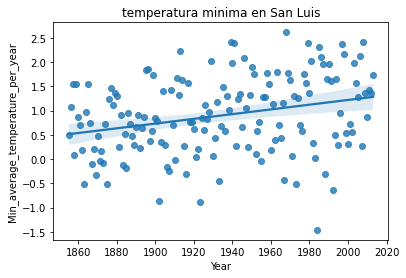

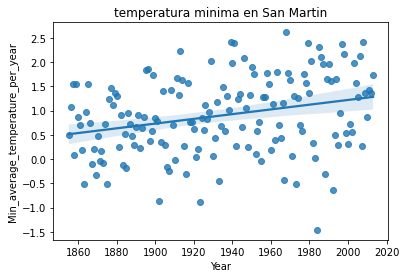

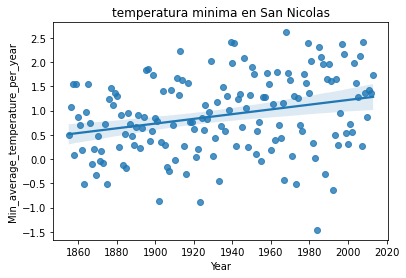

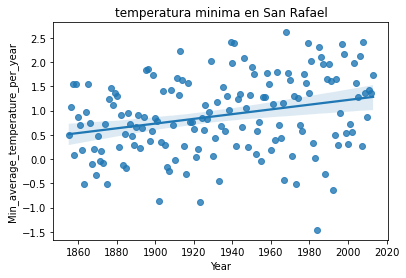

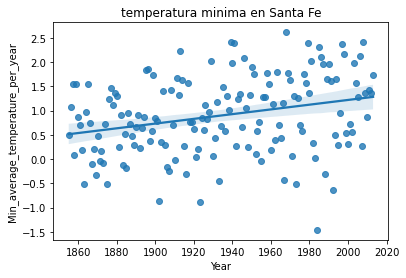

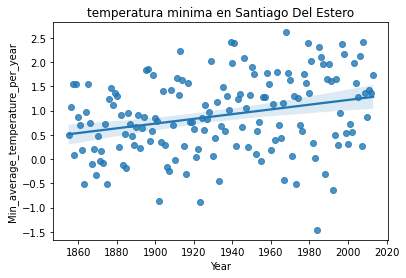

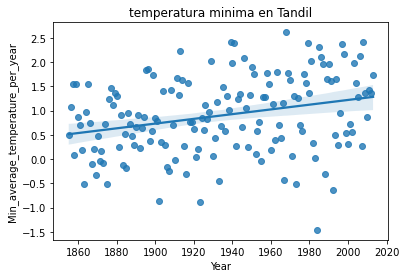

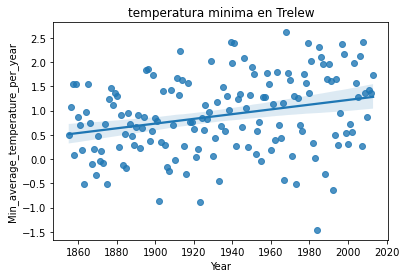

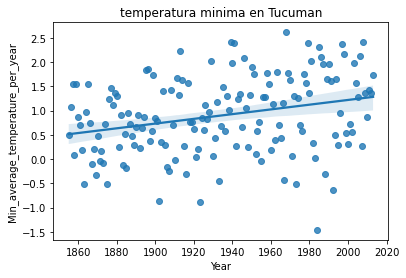

In [30]:
for i in city:
    DATA = argentina_min[argentina_min["City"] == i]
    plt.figure()
    ax = sns.regplot(x = "Year", y = "Min_average_temperature_per_year", data = DATA).set(title = f"temperatura minima en {i}")

# See other factors

In [31]:
cordoba = pd.read_csv("cordoba.csv")

In [32]:
cordoba.head()

,web-scraper-order,web-scraper-start-url,Año,Temperatura media anual,Temperatura máxima media anual,Temperatura mínima media anual,Precipitación total anual de lluvia y/o nieve derretida (mm),Velocidad media anual del viento (Km/h),Total días con lluvia durante el año,Total días que nevó durante el año,Total días con tormenta durante el año,Total días con niebla durante el año,Total días con tornados o nubes de embudo durante el año,Total días con granizo durante el año
0,1636132787-49,https://www.tutiempo.net/clima/ws-873440.html,2016,16.3,24.8,9.7,987.82,11.9,131,1,62,28,0,1
1,1636132787-10,https://www.tutiempo.net/clima/ws-873440.html,1977,17.7,24.2,11.5,856.47,14.0,114,3,44,13,0,2
2,1636132787-19,https://www.tutiempo.net/clima/ws-873440.html,1986,-,-,-,-,-,-,-,-,-,-,-
3,1636132787-18,https://www.tutiempo.net/clima/ws-873440.html,1985,17.5,24.0,12.2,-,12.0,126,0,64,21,0,1
4,1636132787-1,https://www.tutiempo.net/clima/ws-873440.html,1957,-,-,-,-,-,-,-,-,-,-,-


In [33]:
cordoba = cordoba.drop(["web-scraper-order", "web-scraper-start-url"], axis = 1)

In [34]:
cordoba.replace("-", np.nan, inplace = True)

In [35]:
cordoba["Año"] = pd.to_datetime(cordoba["Año"]) 

cordoba["Temperatura media anual"] = pd.to_numeric(cordoba["Temperatura media anual"]) 

cordoba["Temperatura máxima media anual"] = pd.to_numeric(cordoba["Temperatura máxima media anual"]) 

cordoba["Temperatura mínima media anual"] = pd.to_numeric(cordoba["Temperatura mínima media anual"]) 

cordoba["Precipitación total anual de lluvia y/o nieve derretida (mm)"] = pd.to_numeric(cordoba["Precipitación total anual de lluvia y/o nieve derretida (mm)"]) 

cordoba["Velocidad media anual del viento (Km/h)"] = pd.to_numeric(cordoba["Velocidad media anual del viento (Km/h)"]) 

cordoba["Total días con lluvia durante el año"] = pd.to_numeric(cordoba["Total días con lluvia durante el año"]) 

cordoba["Total días que nevó durante el año"] = pd.to_numeric(cordoba["Total días que nevó durante el año"]) 

cordoba["Total días con tormenta durante el año"] = pd.to_numeric(cordoba["Total días con tormenta durante el año"]) 

cordoba["Total días con niebla durante el año"] = pd.to_numeric(cordoba["Total días con niebla durante el año"]) 

cordoba["Total días con tornados o nubes de embudo durante el año"] = pd.to_numeric(cordoba["Total días con tornados o nubes de embudo durante el año"]) 

cordoba["Total días con granizo durante el año"] = pd.to_numeric(cordoba["Total días con granizo durante el año"]) 

In [36]:
cordoba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   Año                                                           54 non-null     datetime64[ns]
 1   Temperatura media anual                                       46 non-null     float64       
 2   Temperatura máxima media anual                                46 non-null     float64       
 3   Temperatura mínima media anual                                46 non-null     float64       
 4   Precipitación total anual de lluvia y/o nieve derretida (mm)  25 non-null     float64       
 5   Velocidad media anual del viento (Km/h)                       46 non-null     float64       
 6   Total días con lluvia durante el año                          46 non-null     float64       
 7   Total días

In [37]:
cordoba.head(6)

,Año,Temperatura media anual,Temperatura máxima media anual,Temperatura mínima media anual,Precipitación total anual de lluvia y/o nieve derretida (mm),Velocidad media anual del viento (Km/h),Total días con lluvia durante el año,Total días que nevó durante el año,Total días con tormenta durante el año,Total días con niebla durante el año,Total días con tornados o nubes de embudo durante el año,Total días con granizo durante el año
0,1970-01-01 00:00:00.000002016,16.3,24.8,9.7,987.82,11.9,131.0,1.0,62.0,28.0,0.0,1.0
1,1970-01-01 00:00:00.000001977,17.7,24.2,11.5,856.47,14.0,114.0,3.0,44.0,13.0,0.0,2.0
2,1970-01-01 00:00:00.000001986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-01-01 00:00:00.000001985,17.5,24.0,12.2,NaN,12.0,126.0,0.0,64.0,21.0,0.0,1.0
4,1970-01-01 00:00:00.000001957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1970-01-01 00:00:00.000002000,16.7,24.2,10.9,NaN,12.6,125.0,1.0,49.0,19.0,0.0,2.0


In [38]:
cordoba.to_csv("cordoba_masticado.csv")

In [39]:
df = pd.read_csv("cordoba_masticado.csv")

df.head()

,Unnamed: 0,Año,Temperatura media anual,Temperatura máxima media anual,Temperatura mínima media anual,Precipitación total anual de lluvia y/o nieve derretida (mm),Velocidad media anual del viento (Km/h),Total días con lluvia durante el año,Total días que nevó durante el año,Total días con tormenta durante el año,Total días con niebla durante el año,Total días con tornados o nubes de embudo durante el año,Total días con granizo durante el año
0,0,1970-01-01 00:00:00.000002016,16.3,24.8,9.7,987.82,11.9,131.0,1.0,62.0,28.0,0.0,1.0
1,1,1970-01-01 00:00:00.000001977,17.7,24.2,11.5,856.47,14.0,114.0,3.0,44.0,13.0,0.0,2.0
2,2,1970-01-01 00:00:00.000001986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1970-01-01 00:00:00.000001985,17.5,24.0,12.2,NaN,12.0,126.0,0.0,64.0,21.0,0.0,1.0
4,4,1970-01-01 00:00:00.000001957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
